# Recent COVID-19 events have placed an emphasis on "flattening the curve" so that the number of cases does not exceed the capacity to handle those cases

## The purpose of this is to provide a time-series forecast model to predict if the number of positives a country/territory will receive within the next number of days will increase or decrease

> data from: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

# Models used:

> AutoRegressive Integrated Moving Average (ARIMA) used as a baseline and for feature selection, referenced a guide from Jason Brownlee: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

> Multiple classification machine learning algorithms from scikit learn to determine if the number will go up or down

In [1]:
# Import custom Time_Series python library with function definitions and other imports
%run ./Time_Series.ipynb

# Read, Mungle, and Plot Data

,Day,Cases,Country,Date,Valid
0,1,27,China,2019-12-31,True
1,2,0,China,2020-01-01,True
2,3,0,China,2020-01-02,True
3,4,17,China,2020-01-03,True
4,5,0,China,2020-01-04,True


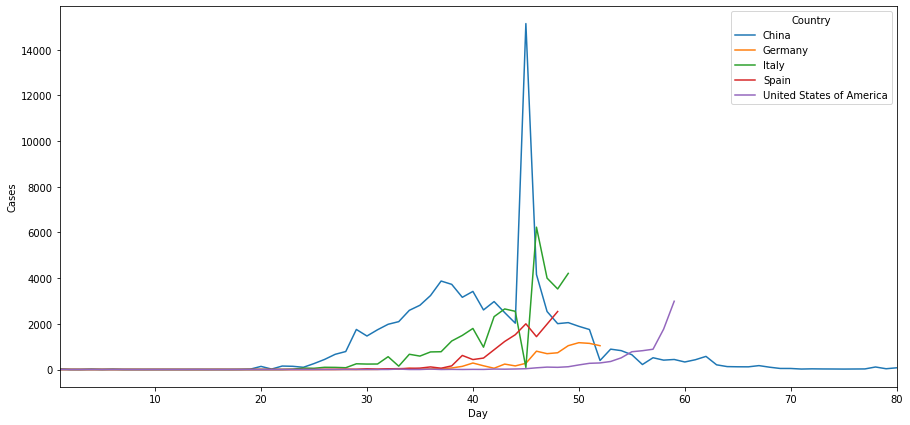

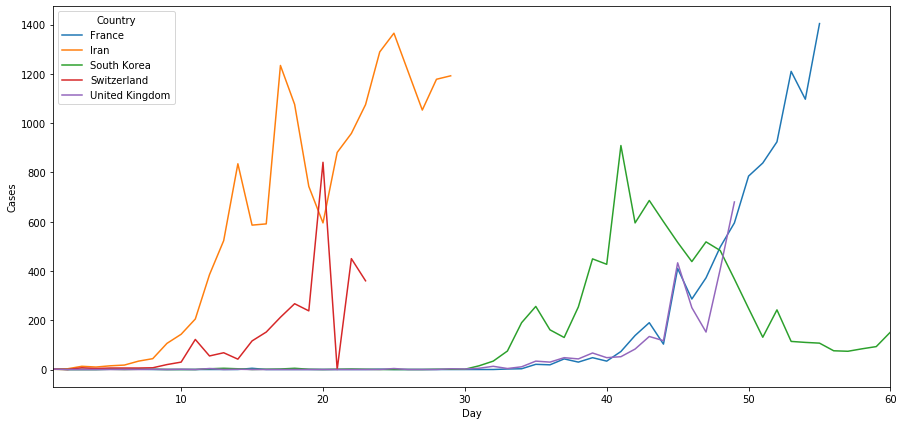

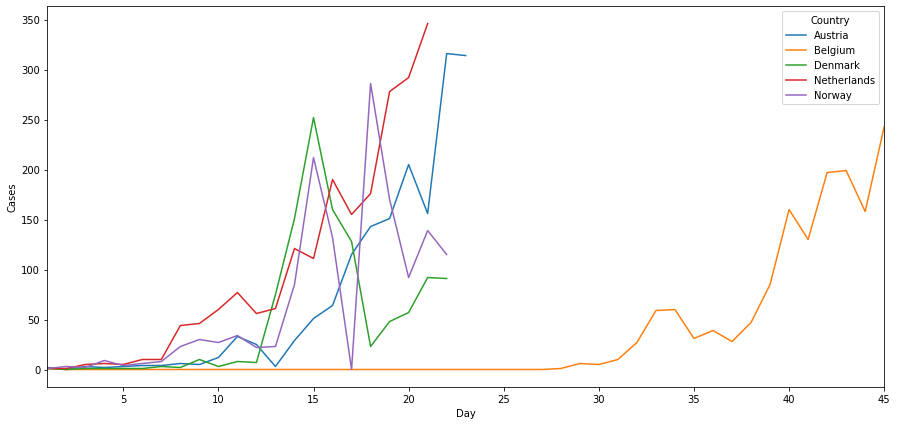

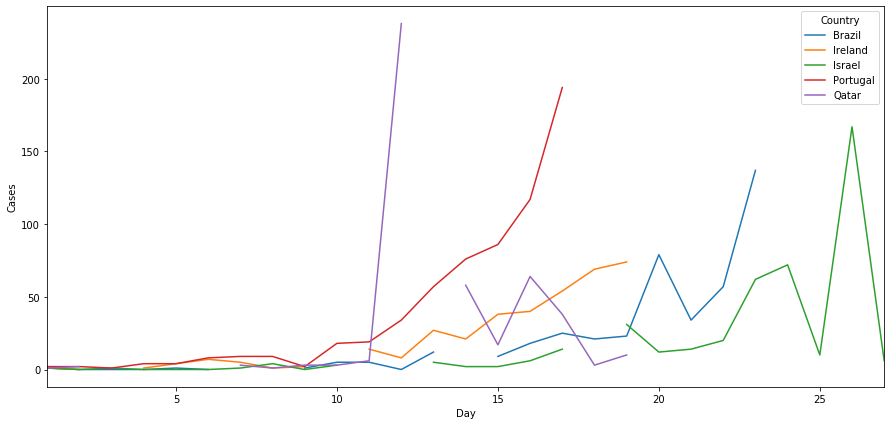

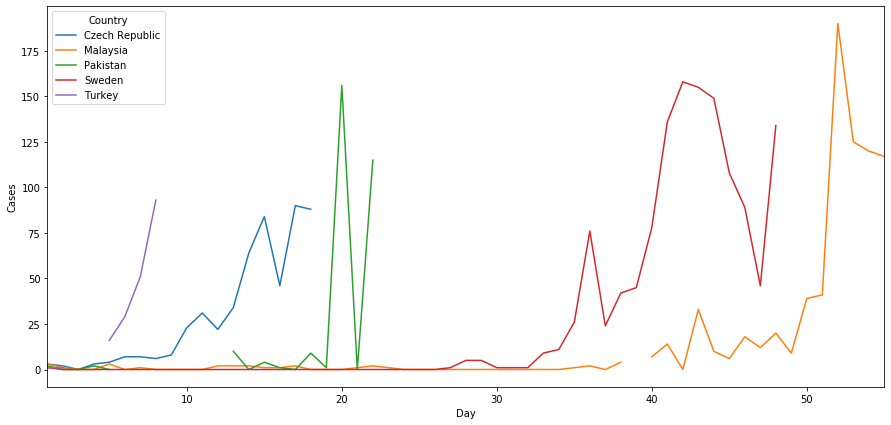

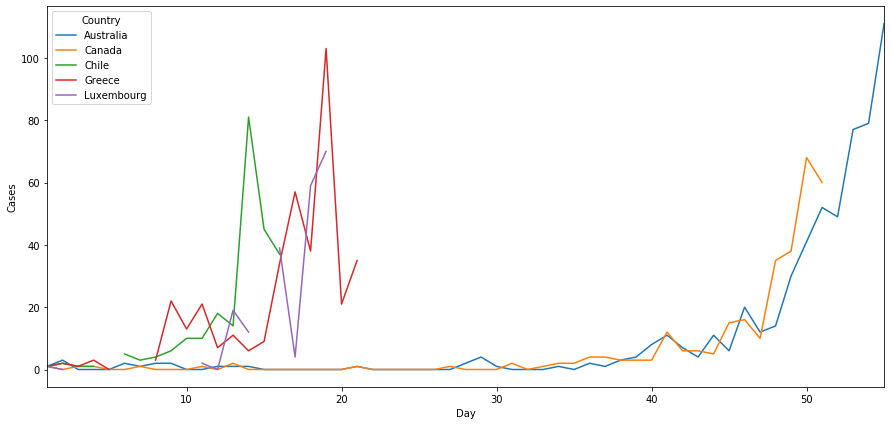

In [2]:
data = readCOVID19('COVID-19_cases_20200329.csv', cases_max=100)
plot5(data)
data.head()

# FEATURE SELECTION

In [3]:
# prepare data for ARIMA and autocorrelation
data_dict = data_prep_ARIMA(data)
print(data_dict)

{'China': [27, nan, nan, 17, nan, 15, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4, 17, 136, 19, 151, 140, 97, 259, 441, 665, 787, 1753, 1466, 1740, 1980, 2095, 2590, 2812, 3237, 3872, 3727, 3160, 3418, 2607, 2974, 2490, 2028, 15141, 4156, 2538, 2007, 2052, 1890, 1750, 394, 891, 826, 647, 218, 515, 410, 439, 329, 428, 574, 205, 127, 119, 117, 170, 101, 46, 45, 20, 29, 24, 22, 19, 22, 25, 110, 33, 75], 'Italy': [3, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 14, 62, 53, 97, 93, 78, 250, 238, 240, 561, 146, 667, 587, 769, 778, 1247, 1492, 1797, 977, 2313, 2651, 2547, 90, 6230, 4000, 3526, 4207], 'Germany': [1, 3, nan, 1, 2, 1, 1, 2, nan, nan, 1, 1, nan, nan, nan, 2, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2, 4, 26, 10, 54, 18, 28, 39, 66, 138, 284, 163, 55, 237, 157, 271, 802, 693, 733, 1043, 1174, 1144, 1042], 'United States of America': [1, nan, nan, nan, 1, nan, 3, nan, nan, nan, 1, 1, 1,

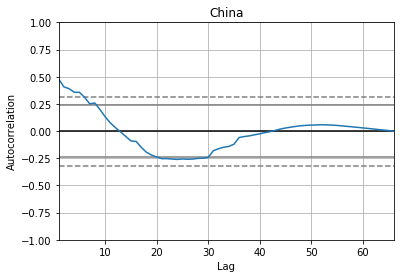

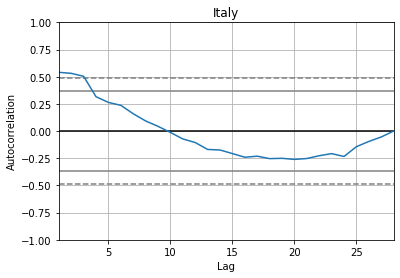

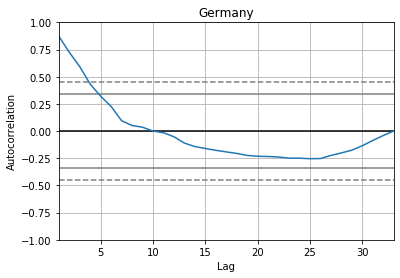

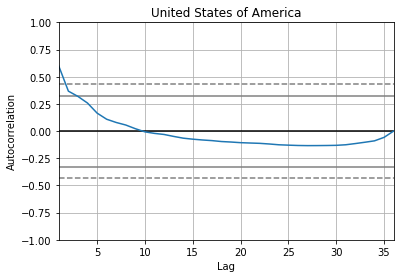

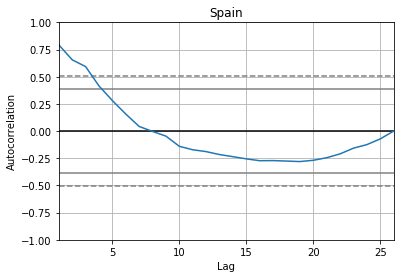

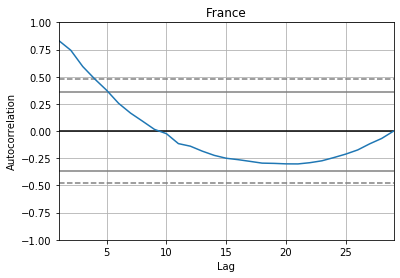

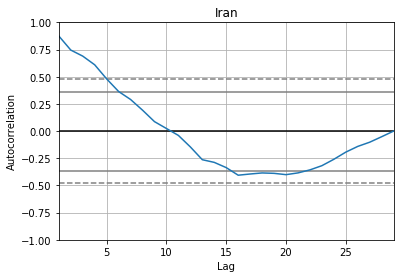

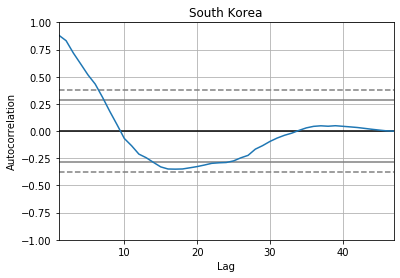

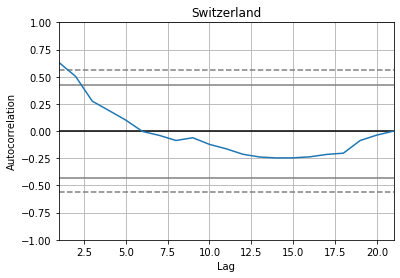

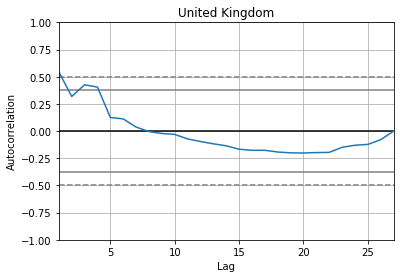

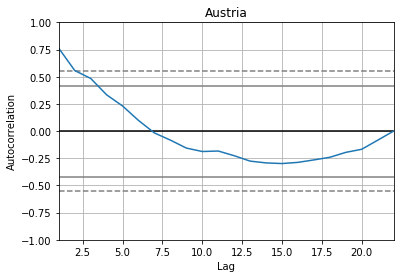

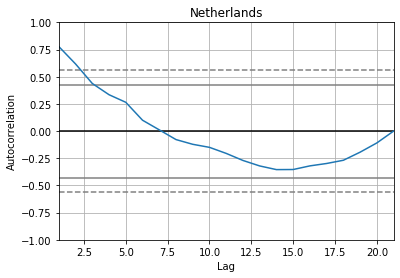

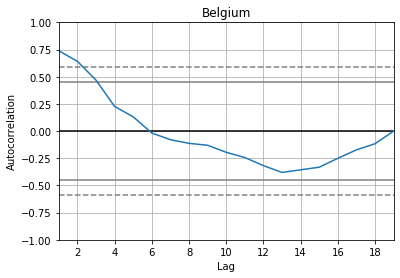

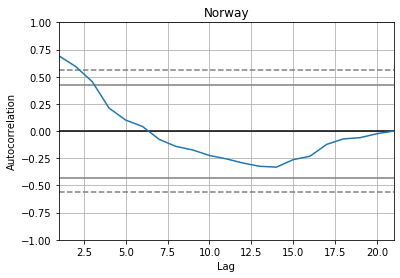

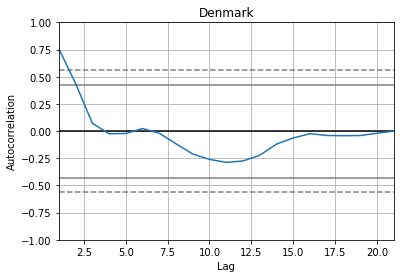

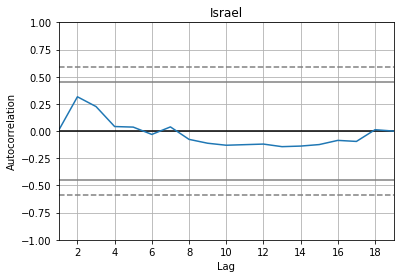

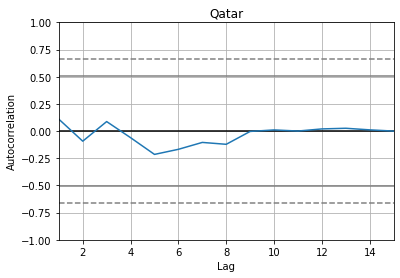

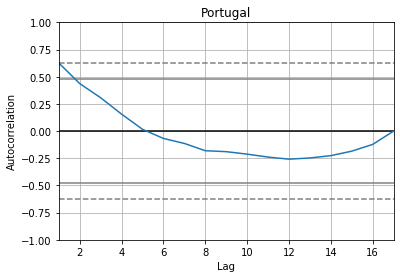

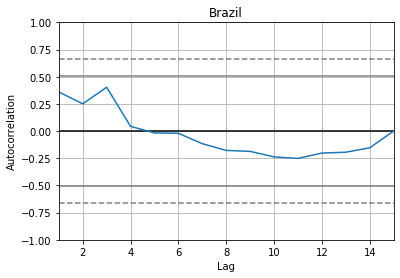

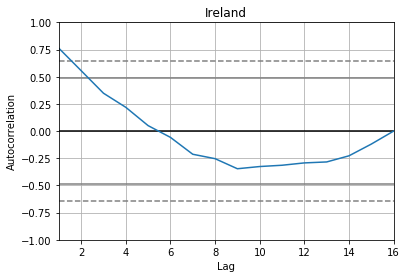

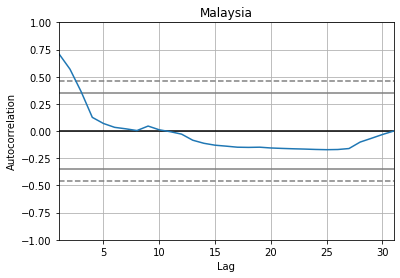

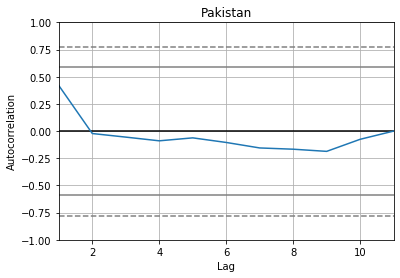

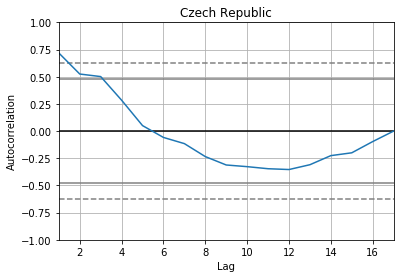

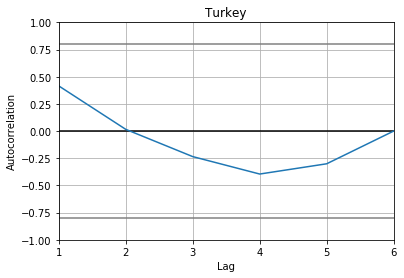

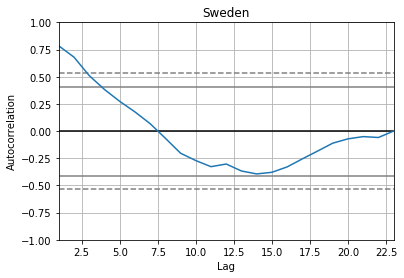

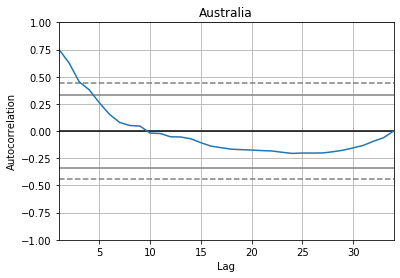

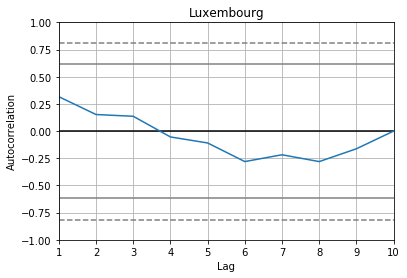

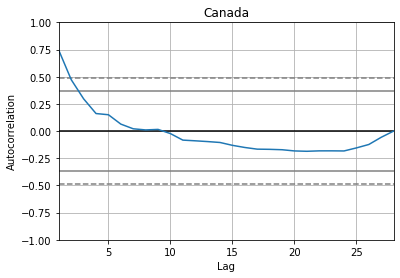

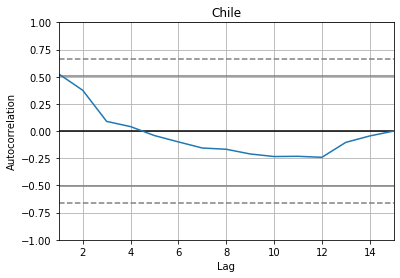

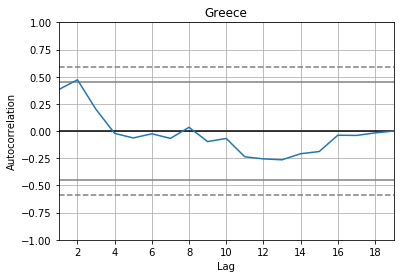

In [4]:
# run autocorrelation to see good numbers of lags to use
autocorrelation_plots(data_dict)

#### looks like between ~(1-10) lags are correlated (some countries can use more, most around 5)
#### lets use ARIMA to get a baseline, an idea of how many lags should be used, any derivatives, and size of moving average

In [5]:
# run ARIMA testing over a range of lags, derivatives, and moving average days
#ARIMA_results = iter_ARIMA(data_dict, range(0, 15, 1), range(0, 2, 1), range(1, 15, 1), 'ARIMA_results')
    
# read pickle files (from previous ran ARIMAs) and display tables
ARIMA_results = read_ARIMA(['ARIMA_results'])

  Lags    Derv    Days    RMSE %     RMSE    Accuracy %    % Converged    Exec Time (s)
------  ------  ------  --------  -------  ------------  -------------  ---------------
     1       0       0     33.58    22.79         92.41           7.93          5.47917
     2       0       0     39.53    39.18         80.65           6.42         10.1791
     3       0       0     31.48    83.38         70.45           4.7          15.4563
     4       0       0     35.94    63.43         73.91           2.54         10.1969
     5       0       0     36.87    97.35         75              1.83         14.8967
     6       0       0      6.64    75.03         71.43           0.83         12.4983
     7       0       0     18.64   201.86         71.43           0.86         15.8469
     8       0       0      7.03    83.92         40              0.64         18.8138
     9       0       0     14.26    70.42         66.67           0.79         33.5564
    10       0       0     15.7    189.3

#### From a previous test, I chose the models which have the best RMSE and convergence, and one with a good balance betwen both
#### A) 12 lags, 1 derivative, 6 day moving window >>>> 34.91% RMSE, 3 cases RMSE, 1.05% datapoints convergence
#### B) 1 lag, 1 derivative, 0 day moving window >>>> 172.23% RMSE, 591 cases RMSE, 98.53% datapoints convergence 
#### C) 4 lag, 0 derivative, 2 day moving window >>>> 75.66% RMSE, 73 cases RMSE, 10.89% datapoitns convergence

# Prepare Data for Machine Learning

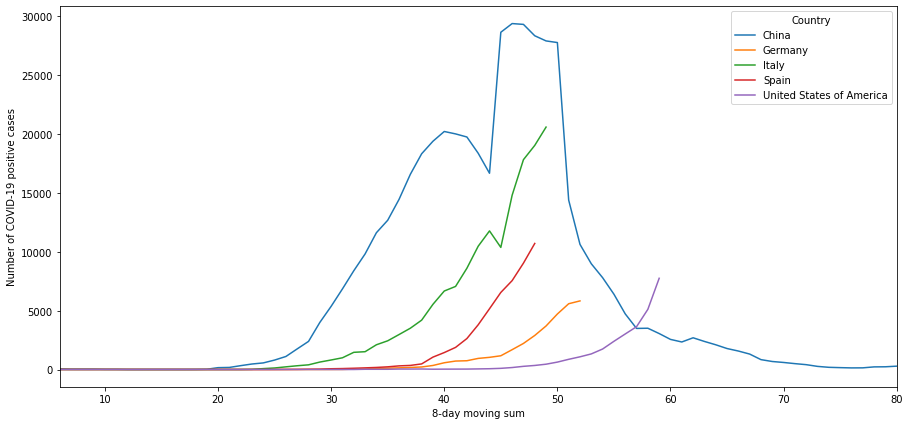

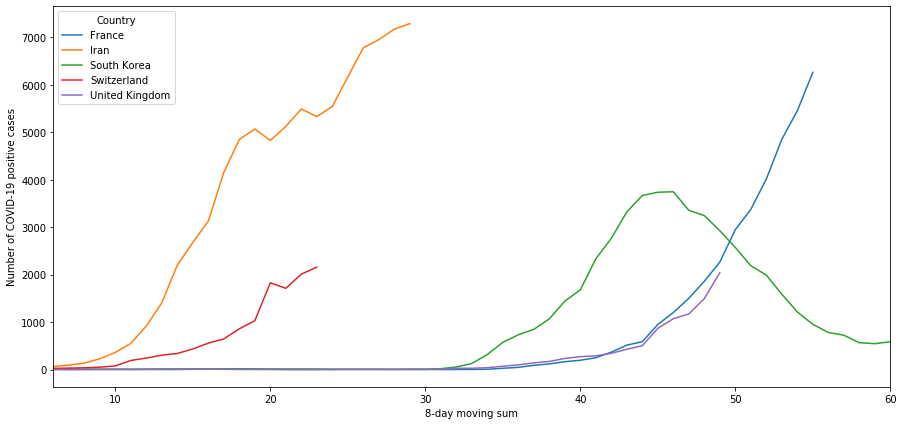

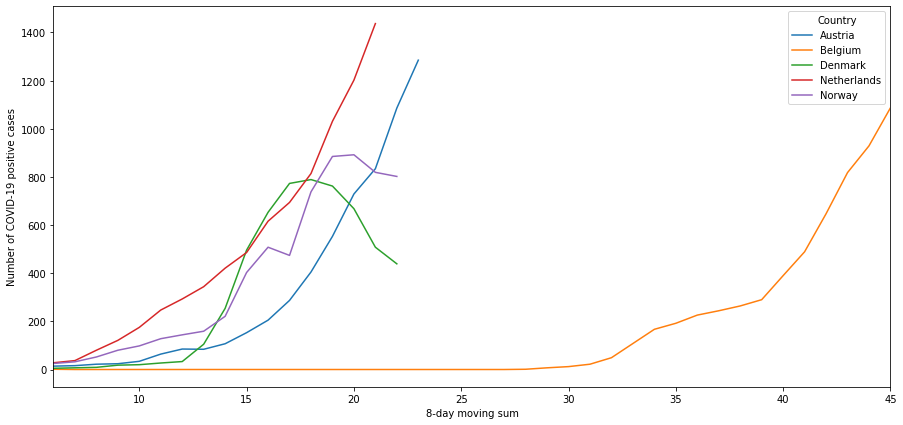

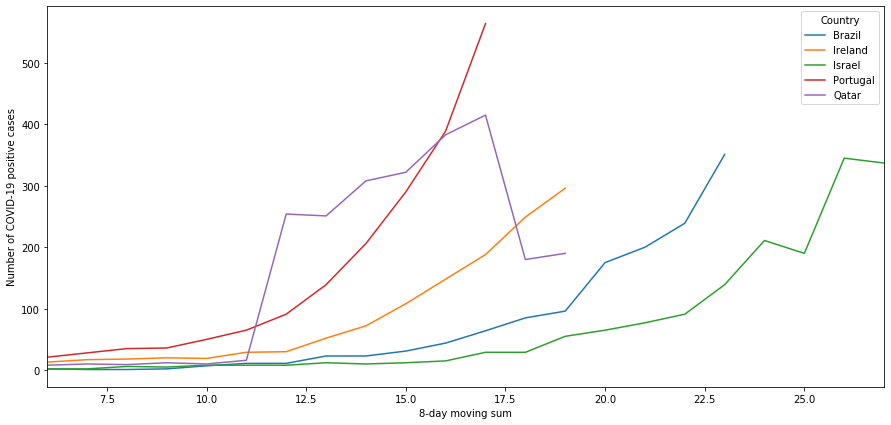

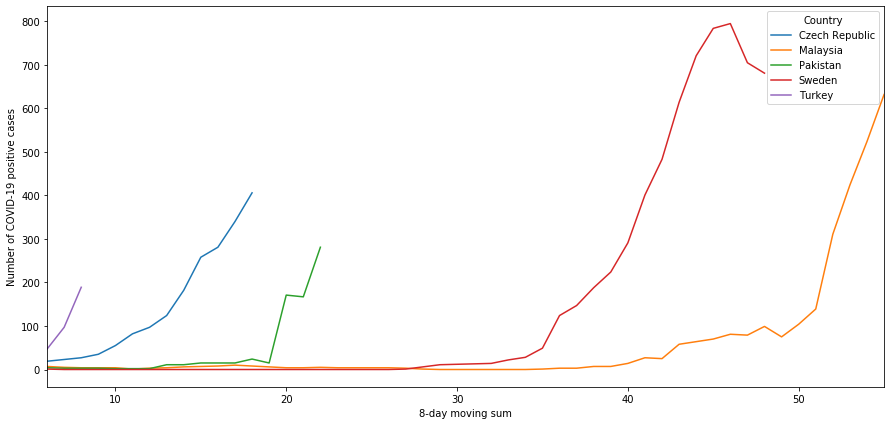

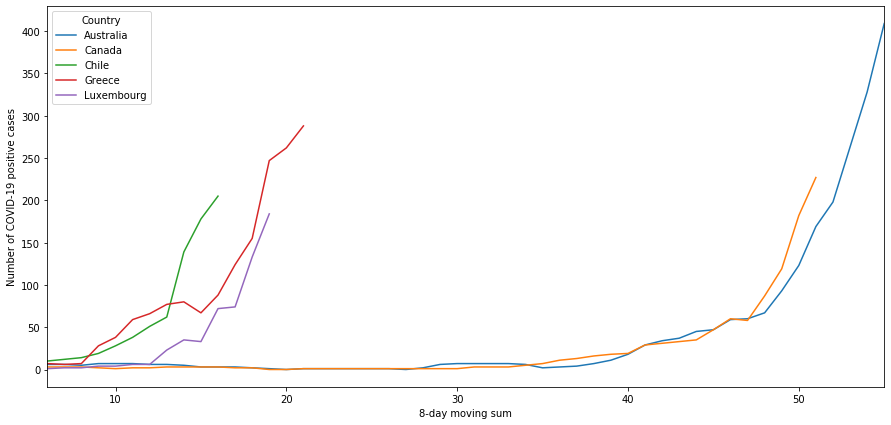

In [6]:
# resample data, seperates into several chunks with Xs and Ys for train and test, 
    # also cross-indexed to day, country, and valid 
#samples = {}
#samples['A'] = prepare_MLA(data, window_size=6, lags=12, outputs=1, sample_name='A', label_type='class', deriv=True)
#samples['B'] = prepare_MLA(data, window_size=1, lags=1, outputs=1, sample_name='B', label_type='class', deriv=True)
#samples['C'] = prepare_MLA(data, window_size=2, lags=4, outputs=1, sample_name='C', label_type='class', deriv=False)
    
# read sampled data
samples = read_samples(['A', 'B', 'C'])
    
# view data using an 8-day moving window (looks much much smoother now)
plot5(samples['A']['data'], '8-day moving sum', 'Number of COVID-19 positive cases')

In [7]:
print(samples['A']['Xs']['train'])
print(samples['A']['Ys']['train'])

[[-27, 0, 0, -17, 0, -15, 0, 0, 0, 0, 0, 4], [0, 0, -17, 0, -15, 0, 0, 0, 0, 0, 4, 17], [0, -17, 0, -15, 0, 0, 0, 0, 0, 4, 17, 136], [-17, 0, -15, 0, 0, 0, 0, 0, 4, 17, 136, 19], [0, -15, 0, 0, 0, 0, 0, 4, 17, 136, 19, 151], [-15, 0, 0, 0, 0, 0, 4, 17, 136, 19, 151, 140], [0, 0, 0, 0, 0, 4, 17, 136, 19, 151, 140, 93], [0, 0, 0, 0, 4, 17, 136, 19, 151, 140, 93, 242], [0, 0, 0, 4, 17, 136, 19, 151, 140, 93, 242, 305], [0, 0, 4, 17, 136, 19, 151, 140, 93, 242, 305, 646], [0, 4, 17, 136, 19, 151, 140, 93, 242, 305, 646, 636], [4, 17, 136, 19, 151, 140, 93, 242, 305, 646, 636, 1613], [17, 136, 19, 151, 140, 93, 242, 305, 646, 636, 1613, 1369], [136, 19, 151, 140, 93, 242, 305, 646, 636, 1613, 1369, 1481], [19, 151, 140, 93, 242, 305, 646, 636, 1613, 1369, 1481, 1539], [151, 140, 93, 242, 305, 646, 636, 1613, 1369, 1481, 1539, 1430], [140, 93, 242, 305, 646, 636, 1613, 1369, 1481, 1539, 1430, 1803], [93, 242, 305, 646, 636, 1613, 1369, 1481, 1539, 1430, 1803, 1059], [242, 305, 646, 636, 1613

# Cross-validate for model selection

In [8]:
# list mlas to use in class MLA models
mlas_class = ['MLP', 'DTr', 'RFo', 'ETr', 'NBa', 'SVM', 'KNN']

Percent positive =  62.75303643724696


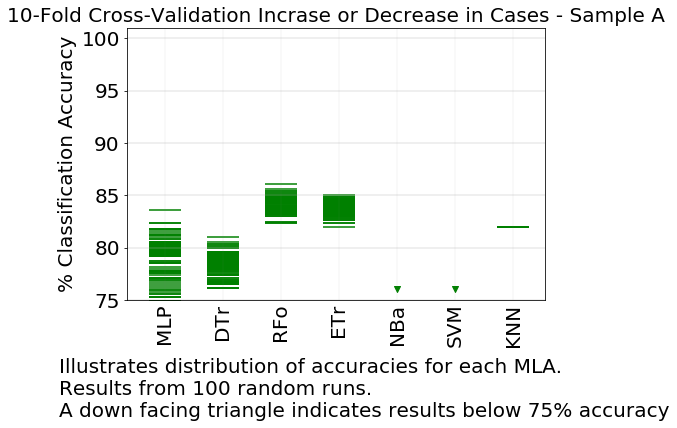

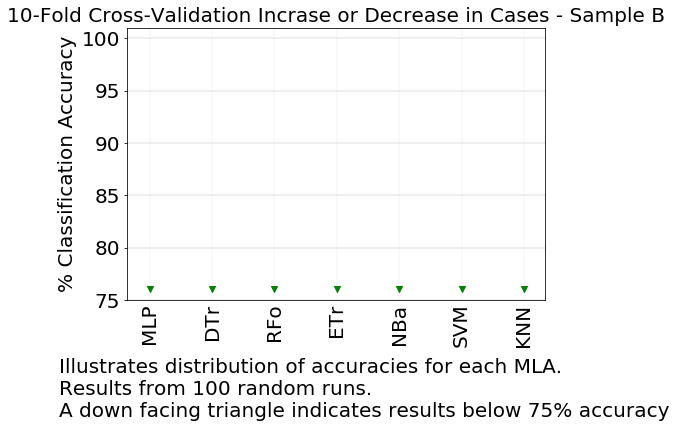

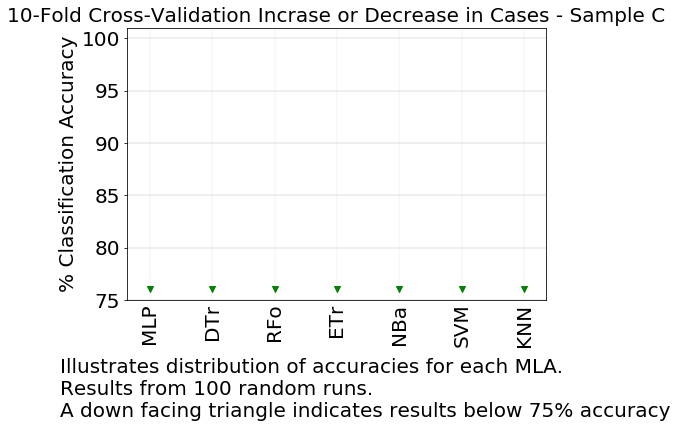

In [9]:
# run classification results 
#class_results = mla_class_results(mlas_class, samples, [], disp=True)

# read classification results
class_results = mla_class_results(mlas_class, [], ['A', 'B', 'C'])

# print baseline of number of increases
print('Percent positive = '
      , 100. * len([x[0] for x in samples['A']['Ys']['train'] if x[0] == 1]) / len(samples['A']['Ys']['train']))

In [10]:
# It is clear from the above plots that model A yields the highest scores
    # Model A = 12 lags, 1 derivative, 6 day moving window
# The highst scoring MLA's were Random Forests (RFo) and Extra Trees (ETr)

# Optimizing pre-processing

In [12]:
rerun = False
header = ['Window Size', 'Lags', 'Derivative?', 'Standardized?', 'Accuracy %', 'Exec Time (s)'] # header to display table

if rerun:
    #iterate through different window_sizes and lags and check standardizing
    table = [] # table for output, previewing live results
    times = [] # list of how long each iteration takes
    timer = Timer() # init timer
    all_results = {} # keep track of results
    for window_size in range(1, 15, 1):
        all_results[window_size] = {}
        for lags in range(1, 15, 1):
            all_results[window_size][lags] = {}
            for deriv in [False, True]:
                all_results[window_size][lags][deriv] = {}
                for std in [False, True]:

                    # get data
                    samples = {}
                    samples['temp'] = prepare_MLA(data, window_size=window_size, lags=lags
                                                  , outputs=1, sample_name='temp', label_type='class', deriv=deriv)
                    if std:
                        samples, means, stds = standardize(samples, std_labels=False)
                    # get mla results
                    class_results = mla_class_results(['RFo'], samples, [], disp=False)
                    # save results
                    all_results[window_size][lags][deriv][std] = class_results['temp']['RFo']
                    # check timer
                    this_time = timer.get()
                    # add results to table
                    table.append([window_size, lags, deriv, std
                                  , 100*sum(class_results['temp']['RFo'])/len(class_results['temp']['RFo']), this_time])
                    # show results
                    clear_output() # clear output on screen for new table
                    print(tabulate(table, headers=header)) # print new table
    # write tabled results
    with open('preprocess_results', 'wb') as outfile:
        pickle.dump(table, outfile)
else:
    # read tabled results
    with open('preprocess_results', 'rb' ) as infile:
        table = pickle.load(infile)
        print(tabulate(table, headers=header)) # print new table

  Window Size    Lags  Derivative?    Standardized?      Accuracy %    Exec Time (s)
-------------  ------  -------------  ---------------  ------------  ---------------
            1       1  False          False                 59.4491          77.4155
            1       1  False          True                  56.7694          92.1251
            1       1  True           False                 57.711           76.3302
            1       1  True           True                  60.3126          89.7028
            1       2  False          False                 64.3644          79.8368
            1       2  False          True                  60.0242          86.5051
            1       2  True           False                 63.2119          81.6565
            1       2  True           True                  60.8239          86.9028
            1       3  False          False                 65.864           80.4553
            1       3  False          True                  63.51

# rerunning MLA results with optimized pre-processing

sample A ...
MLA MLP ...


'Average classification accuracy = 82.70%'

MLA DTr ...


'Average classification accuracy = 84.54%'

MLA RFo ...


'Average classification accuracy = 89.82%'

MLA ETr ...


'Average classification accuracy = 86.90%'

MLA NBa ...


'Average classification accuracy = 76.33%'

MLA SVM ...


'Average classification accuracy = 74.49%'

MLA KNN ...


'Average classification accuracy = 83.88%'

521.9113547801971


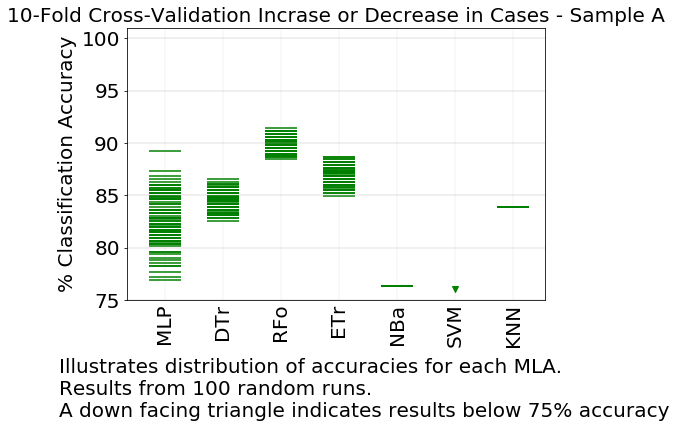

In [13]:
timer = Timer() # init timer
samples = {}
samples['D'] = prepare_MLA(data, window_size=13, lags=12, outputs=1, sample_name='D', label_type='class', deriv=True)

# run classification results 
class_results = mla_class_results(mlas_class, samples, [], disp=True)
print(timer.get())